# Wanted to see if notebooks where easier to use
today i used notebooks to do the coding chalange

## Part 1

In [ ]:
import numpy as np
f = open("input9a.txt", "r")
f = f.read().split()
f = [[int(y) for y in list(x)] for x in f]

f = np.array(f)
f = np.pad(f, 1, constant_values=10)


In [ ]:
# finding the lowpoints
low_points = []
for i in range(1,len(f)):
    for j in range(1,len(f[i])):
        if f[i][j] < f[i-1][j] and f[i][j] < f[i][j-1] and f[i][j] < f[i+1][j] and f[i][j] < f[i][j+1]:
            low_points.append(f[i][j] + 1)

In [ ]:
sum(low_points)

## Part 2

[got idea for flood fill by](https://stackoverflow.com/questions/19839947/flood-fill-in-python)

In [3]:
import numpy as np
g = open("input9b.txt", "r")
g = g.read().split()
g = [[int(y) for y in list(x)] for x in g]

g = np.array(g)


In [13]:
from functools import reduce
from operator import mul

def defineBorders(map):
    map_copy = map.copy()
    for y in range(len(map_copy)):
        for x in range(len(map_copy[0])):
            map_copy[y][x] = 0 if map[y][x]==9 else 1
    return map_copy

def floodfill(matrix, x, y, value):
    if matrix[y][x] == 1:
        matrix[y][x] = value
        if x > 0:
            floodfill(matrix,x-1,y,value)
        if x < len(matrix[y]) - 1:
            floodfill(matrix,x+1,y,value)
        if y > 0:
            floodfill(matrix,x,y-1,value)
        if y < len(matrix) - 1:
            floodfill(matrix,x,y+1,value)
            
def fillBasins(map):
    filled = map.copy()
    ifill = 2
    for y in range(len(filled)):
        for x in range(len(filled[0])):
            if filled[y][x]==1:
                floodfill(filled, x, y, ifill)
                ifill +=1
    return filled

def countBasins(filled_):
    filled_map = np.array(filled_)
    basval = sorted([ sum(filled_map[filled_map==b])//b for b in np.unique(filled_map) if b!=0 ])
    return reduce(mul, basval[-3:], 1)

In [14]:
border = defineBorders(g)
filled_map = fillBasins(border)
print("Test 2:",countBasins(filled_map))

Test 2: 950600


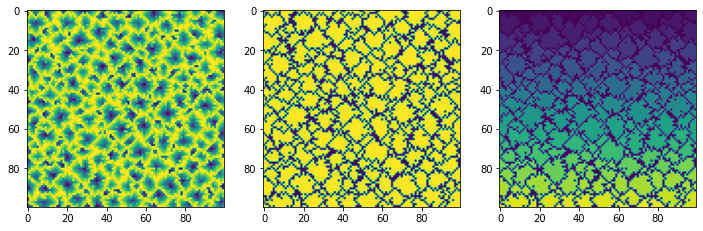

In [ ]:
# visualizing the result
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3,figsize=(12,6))
ax[0].imshow(g)
ax[1].imshow(border)
ax[2].imshow(filled_map)